# Исследование продаж компьютерных игр

**Цель**

Выявить закономерности определяющие успешность игры. Это позволит спланировать рекламную кампании потенциально успешного продукта.


**Что известно на данном этапе**

В нашем распоряжении архив данных о продаже игр до 2016 год. Файл(/datasets/games.csv)

**Что будем делать**
Поделим анализ на 5 этапов:

1) Общий обзор данных;


2) Их предобработка;


3) Исследовательский анализ данных;


4) Составим пользовательский портрет каждого региона;


5) Проверим гипотезы;


6) Сделаем общий вывод;

## Изучаем данные из файла

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#удалил лишний импорт библиотеки
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
display(data_games.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
display(data_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Какие выводы можно сделать на основе этой информации:

1)Значения в столбцах различаются. Это говорит о том, что в файле есть пропуски



2)"Змеиный язык соблюден не везде

Видно столбцы, у которых нужно поменять тип данных. Например, в столбце 

`Year_of_Release` стоит тип float64, хотя год явно подразумевает скорее целое число


Проверим данные на дубликаты и , по возможности, заполним пропуски. 

## Предобработка данных

In [6]:
data_games.duplicated().sum() #проверяем датасет на явные дубликаты

0

Отлично, явных дубликатов нет. Можно идти дальше

In [7]:
#Приведем столбцы к нижнему регистру
data_games.set_axis(data_games.columns.str.lower(), axis='columns', inplace=True)
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
#глянем, где есть пропуски
#для наглядности, посмотрим на эту же информацию в процентном соотношении
#Для этого пройдемся по колонкам и получим кол-во пропусков(в каждом признаке за раз и поделим на общее кол-во в датасете)
for col in data_games.columns:
    print(f'{col}: {data_games[col].isna().sum() / data_games.shape[0] * 100:.2f}%')

name: 0.01%
platform: 0.00%
year_of_release: 1.61%
genre: 0.01%
na_sales: 0.00%
eu_sales: 0.00%
jp_sales: 0.00%
other_sales: 0.00%
critic_score: 51.32%
user_score: 40.09%
rating: 40.48%


Видим несущественное кол-во пропусков у столбцов `name` и `year_of_release`.

Эти строки можно удалить. Такое кол-во не повлияет на информативность датасета

In [9]:
data_games = data_games.dropna(subset=['year_of_release']) # удаляем 
data_games['year_of_release'] = data_games['year_of_release'].astype('int')  # меняем тип на цельночисленный
data_games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [10]:
data_games = data_games.dropna(subset=['name']) #удаляем

Далее рассмотрим столбцы `user_score` и `rating`. Оценку критиков (`critic_score`) мы никак заполнить не сможем. Оставим как есть 

In [11]:
data_games['user_score'].unique() #изучим уникальные значения user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Здесь, помимо Nan, видим аббревиатуру "TBD". Расшифровывается как "to be determined - будет определено". 


Это значит, что рейтинг игры не был определен игроками. Заменим этот пропуск на более привычный нам: пропуск nan.

In [12]:
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = np.nan #заменяем tbd на nan
data_games['user_score'].isna().sum()

8981

Пропусков по-прежнему большое количество. Но ничего поделать с этим не можем. 

Их слишком много, чтобы заменять их медианой или средним. 


Это может изрядно исказить общую картину. Есдинственное, что можем сделать в

рамках обработки этого столбца, перевести его в тип `float`. В каких-либо 


заглушках не вижу необходимости, т.к. мы переводим не в целочисленный тип.

In [13]:
data_games['user_score'] = data_games['user_score'].astype('float')

Изучим столбец `rating`

In [14]:
data_games['rating'].unique() #смотрим уникальные значения столбца rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Есть две мысли, чем можно заполнить здесь пропуски:


*  Можно заполнить пропуски категорией RP, т.к. она, в принципе, может рассматриваться как аналог TBD.

*  Можно заполнить пропуски значением "Unknow" т.к. мы на самом деле не знаем истинную причину пропусков.

Остановимся на 2 варианте, т.к. он кажется, семантически, более правильным. 

Заменим пропуски значением "Unknow"

In [15]:
data_games['rating'] = data_games['rating'].fillna('Unknown')

**Посчитаем суммарные продажи во всех регионах**

Добавим столбец `data_games['total_sales']`, в который сохраним общую сумму продаж

In [16]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

**Вывод**

Мы привели имена столбцов к "змеиному типу", проверили датасет на явные

дубликаты, привели данные в столбце с годом к целочисленному типу и избавились


от записей с критичными пропусками в данных: названием и годом выпуска. 


Также добавили новый столбец - подсчитали суммарный объем продаж во всех регионах

In [17]:
old_df = pd.read_csv('/datasets/games.csv')
#сохраним данные до удаления в отдельной переменной
deleted_elements = data_games.shape[0]/ old_df.shape[0]
#соотносим датасет с обработкой с датасетом без обработки данных
deleted_elements

0.9837870176488184

В результате предобработки данных, удаленные данные в датасете составляют

примерно 0.2 %

Причины, которые могли привести к пропускам: предполагаю, что пропуски в `user_score` и 
    
    
`critic_score` могут быть связаны с тем, что далеко не каждая игра настолько хороша или "хайпова", чтобы обратить на себя внимание критиков.
    
    
Плюс, далеко не каждая игра доходила до международного рынка, чтобы обзавеститсь отзывами со стороны широкого гейм-коммьюнити. Также нельзя забывать об особенностях каждого региона. В частности, ESRB оценивает игры только США и Канады. Пропусками могут являться игры из других регионов </b></font><br>

In [18]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data_games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

### Смотрим, сколько игр выпускались в разные годы и как они продавались

In [19]:
data_games_period = data_games.pivot_table(index = 'platform', 
                                columns = 'year_of_release', 
                                values = 'name', 
                                aggfunc='count',
                                fill_value=0,
                                margins=True
                               ).reset_index()
                               
pd.set_option('display.max_columns', None)
data_games_period

#сделаем сводную для наглядности

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,2600,9,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116
1,3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,80,86,46,512
3,DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,52
4,DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,2121
5,GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97
6,GBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,811
7,GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,152,144,83,97,40,4,0,0,0,0,0,0,0,0,0,542
8,GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
9,GG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
#сделаем версию короче
data_games_period.query('platform == "All"')

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
31,All,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,653,544,581,606,502,16444


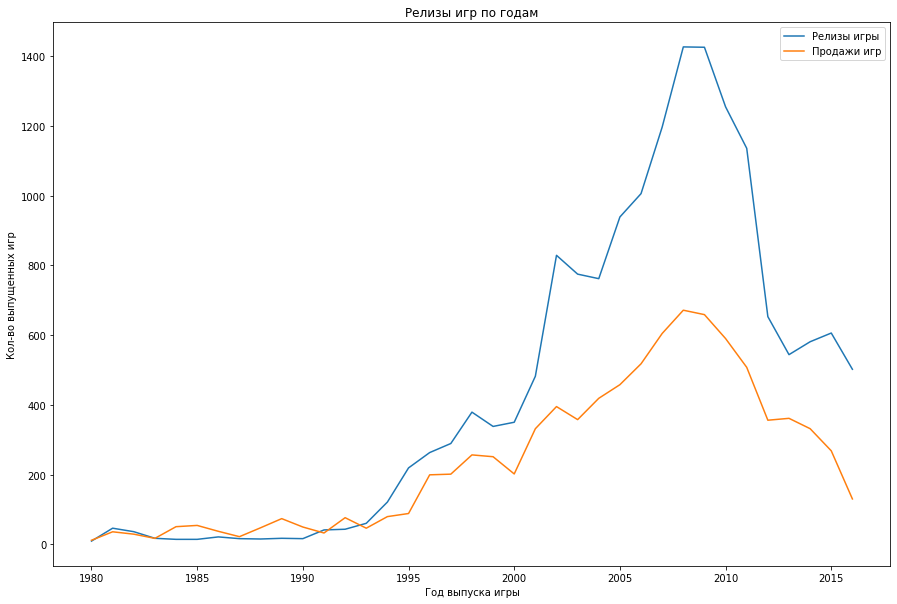

In [21]:
plt.figure(figsize=(15,10))
plt.plot(data_games.groupby('year_of_release')['name'].count(), label='Релизы игры')
plt.plot(data_games.groupby('year_of_release')['total_sales'].sum(), label='Продажи игр')
#добавил название
plt.title('Релизы игр по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Кол-во выпущенных игр')
plt.legend()
plt.show()

Примерно до 1994 года соотношение спроса и предложения было примерно одинаковым.


К концу 90х кол-во игр начало резко расти. Покупательская способность тоже росла, но не была готова к таком кол-ву игр. 

Примерно с 2007 - 2008 года наблюдается резкий обвал как продаж, так и производства игр.

Очень похоже на мировой кризис 2008 года. По разным оценкам, страны могли выходить из него вплоть до 2013 года, а то и позже.

Примечательно, что на графике не видно кризис 1983 года. Хотя, он также оказал немалое влияние на индустрию. 

**Выберем платформы с наибольшими суммарными продажам**

In [22]:
data_games_top = data_games.pivot_table(index = 'platform',  values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
data_games_top

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Визуализируем результат

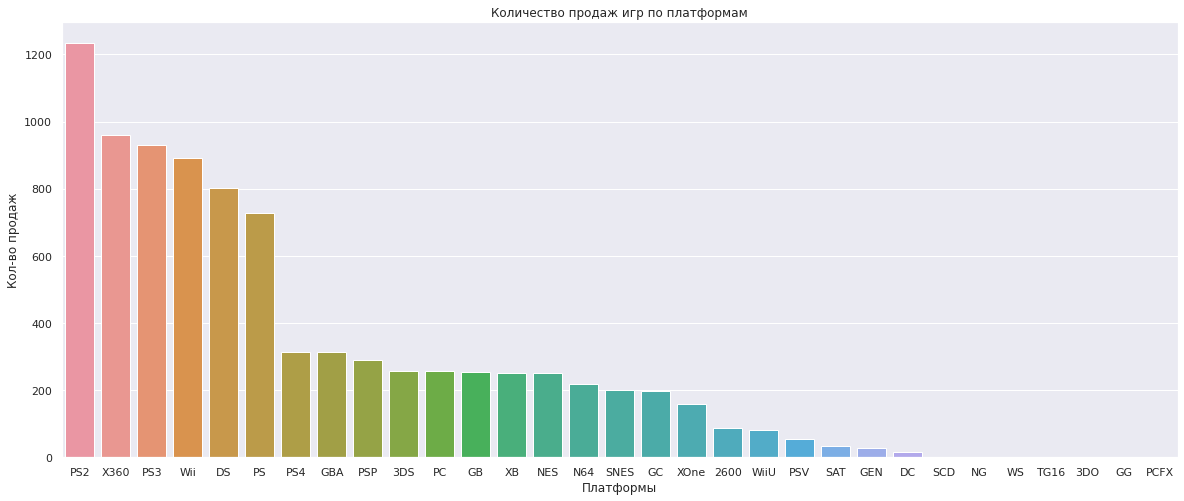

In [64]:
sns.barplot(x=data_games_top.index, y=data_games_top['total_sales'])
#изменил размеры графика
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Количество продаж игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')
plt.show()

Как мы видим, в лидерах по продажам игры на следующие платформы (в порядке убывания):

**1)** PS2

**2)** X360

**3)** Wii

**4)** PS3

**5)** DS

**6)** PS

Посмотрим график продажи игр на самых популярных платформах

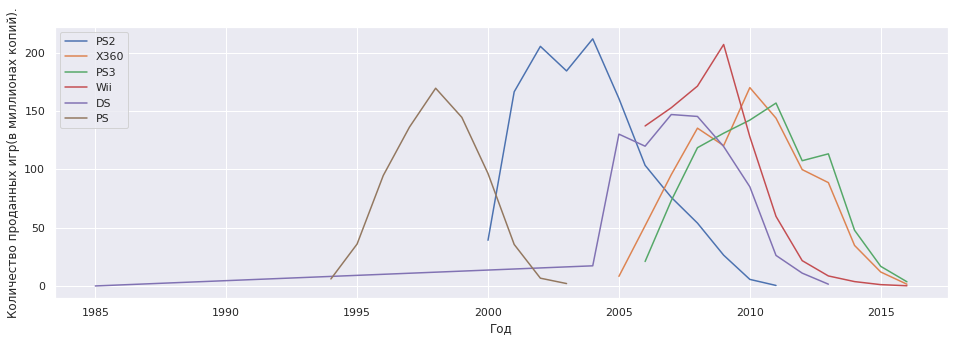

In [24]:
top_6_platform = data_games_top.iloc[0:6] #делаем сред популярных платформ

top_6_list = top_6_platform.index.values.tolist() #создаем список

#создаем график 
plt.figure(figsize=(16, 5))
for platform in top_6_list:
    plt.plot(data_games[data_games['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum'), label=platform)
plt.xlabel('Год')
plt.ylabel('Количество проданных игр(в миллионах копий).')
plt.legend(loc='upper left')
plt.show()

Видим длинную линию у приставки DS, идущую с 1985 года.

Однако, известно, что DS увидела свет только в 2004.



Посмотрим, сколько подобных неточных данных и удалим их.

In [25]:
data_games.query('platform == "DS" and year_of_release <= 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


In [26]:
#удаляем
data_games.drop(index=data_games.query('platform == "DS" and year_of_release <= 1985').index,inplace=True)

Здесь мы видим, что **характерный срок появления новых игроков и исчезновения**

**старых: примерно 10 лет**. Своего пика, как правило, компании достигают спустя

примерно 5 лет (т.е. в середине срока своего существования)

Учитывая выводы выше, логично взять для анализа на следующий год данные за

последние **5 лет**: платформы, у который еще идет рост в течении этого времени, для нас наиболее перспективны.

Исходя из прогноза 10 лет, у них еще не пройден пик продаж и даже после него, во время падения, она сможет приносить хорошие деньги.

Посмотрим данные за 2011-2016 гг.(учитывая, что 16 год может оказаться 

неполным), чтобы понять, какие платформы окажутся в лидерах.

In [27]:
year_games = data_games.query('year_of_release >= 2011').pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    )

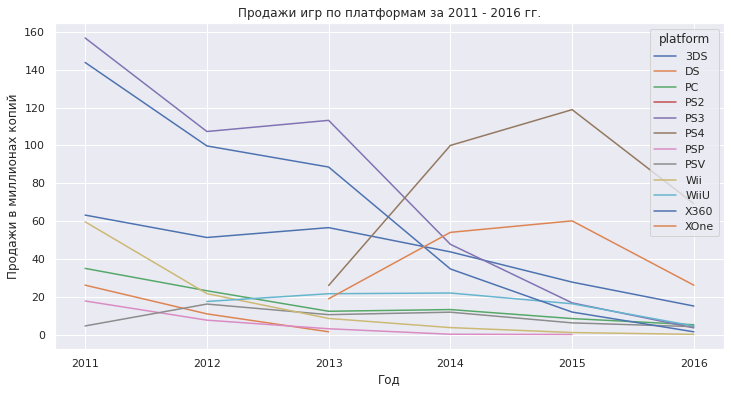

In [28]:
sell_11_16 = year_games.plot(xticks=year_games.index,figsize=(12,6))
ylab = sell_11_16.set_ylabel('Продажи в миллионах копий')
xlab = sell_11_16.set_xlabel('Год')
plt.title('Продажи игр по платформам за 2011 - 2016 гг.')
plt.show()

В лидеры попали 2 приставки: 

1)PS4

2)Xbox One

Их и будем считать самыми перспективными. 


Есть шансы еще приносить доход у PlayStation 3, Xbox 360, Nintendo 3DS и Wii U.


У них продажи только начали падать. На графике видно



In [29]:
gm_act = data_games.query('platform in ["PS4", "XOne", "WiiU", "X360", "3DS", "PS3"] and year_of_release > 2011') 

In [30]:
actual_platforms = ["PS4", "XOne", "WiiU", "X360", "3DS", "PS3"]
gm_act = data_games.query('year_of_release > 2011') 

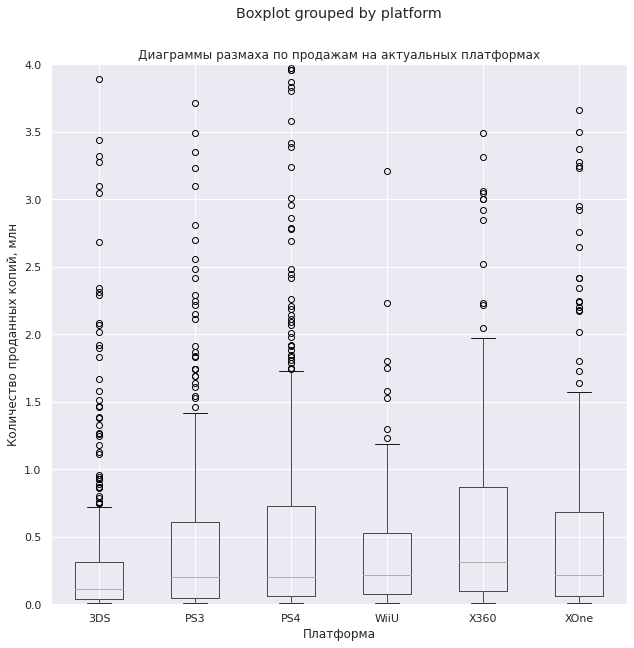

In [31]:
(gm_act.query('platform in @actual_platforms')[['platform', 'name', 'total_sales']]
 .boxplot(column='total_sales', by='platform', figsize=(10,10))
)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 4)
plt.show()

Построим боксплот без фильтрации по платформам за актуальный период.</b></font><br>

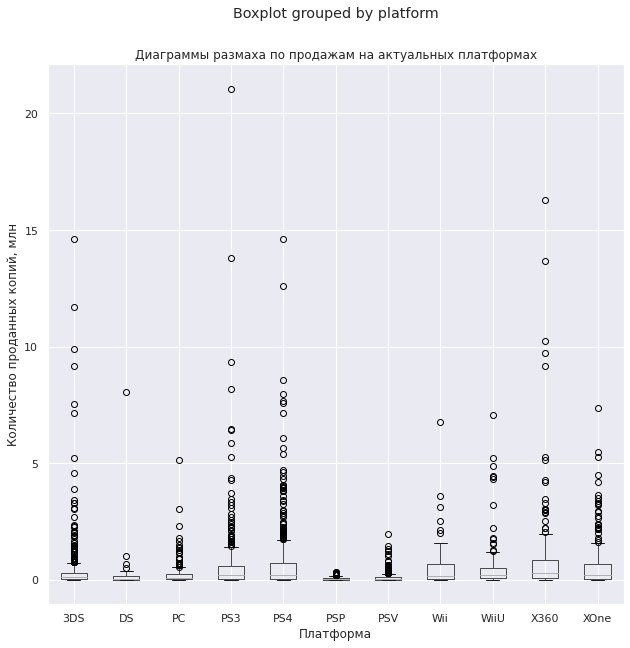

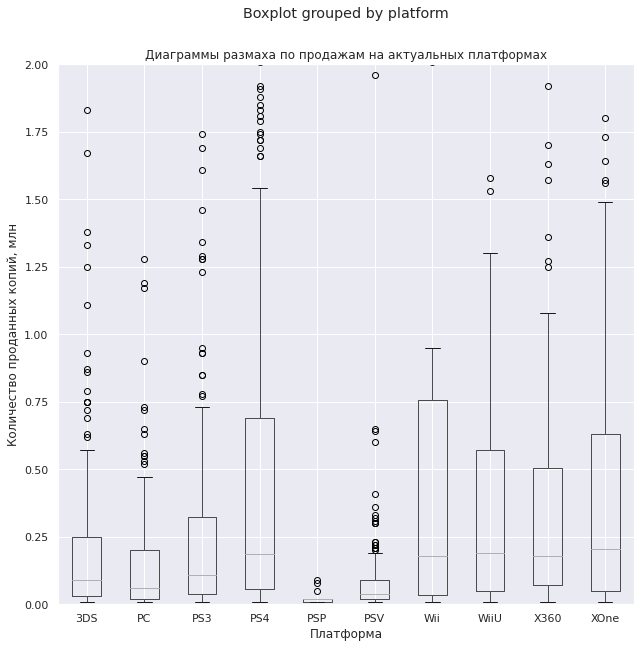

In [32]:
gm_act = data_games.query('year_of_release > 2011') 
gm_act.query('year_of_release > 2011').boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.show()


gm_act = data_games.query('year_of_release > 2011') 
gm_act.query('year_of_release > 2013').boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 2)
plt.show()

Как мы видим, медиана продаж у всех платформ смещена к низу. Скорее всего, это означает, что все платформы выпускают много игр, но они слабо продаются.



Так же видно большое кол-во выбивающихся значений. Предполагаю, что это тайтлы- бестселлеры, продажи который намного выше обычных игр. Давайте на них взглянем.

In [33]:
#смотрю тайтлы-бестселлеры без фильтрации по платформам
df_top_of_platform = gm_act.query('year_of_release >= 2011').sort_values(by= 'total_sales', ascending = False)
df_top_of_platform.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


В 2013 году вышел очередной хит команды Rockstar - **Grand Theft Auto V** и **Call of Duty: Black Ops** от Activision. 

Выпустив эти тайтлы, компании хорошо подняли себе продажи

### Смотрим влияние оценок на продажи

Возьмем самую популярную платформу и посмотрим влияние отзывов пользователей и критиков на продажи ее продажи. 

Возьмем для анализа PS4

In [34]:
#посмотрим корреляцию продаж и отзывов пользователей
game_ps = gm_act[gm_act['platform']== 'PS4'] #создадим переменную с нужными данными

print(f'Корреляция между оценкой пользователей и продажами: {game_ps.user_score.corr(game_ps.total_sales):.2}')

Корреляция между оценкой пользователей и продажами: -0.032


In [35]:
#Теперь связь между продажами и оценками критиков
print(f'Корреляция между оценкой критиков и продажами: {game_ps.critic_score.corr(game_ps.total_sales):.2}')

Корреляция между оценкой критиков и продажами: 0.41


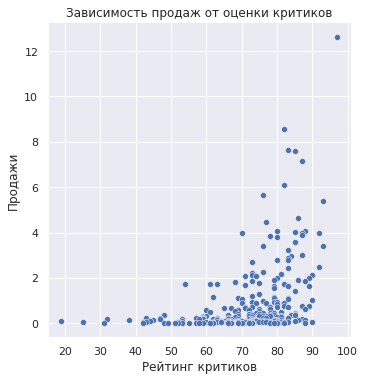

In [36]:
sns.relplot(x='critic_score', y='total_sales',data=game_ps)
plt.title('Зависимость продаж от оценки критиков', fontsize= 12)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.show()
plt.show()

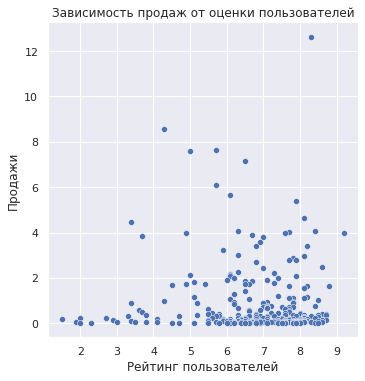

In [37]:
sns.relplot(x='user_score', y='total_sales',data=game_ps)
plt.title('Зависимость продаж от оценки пользователей', fontsize= 12)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.show()

По двум корреляциям заметна зависимость **"чем выше оценка критиков, тем выше продажи"**


* Между оценками критиков и продажами наблюдается линейная корреляция, а


* Между продажами и оценками пользователей корреляция обратная




Посмотрим корреляцию у других платформ

In [38]:
#посмотрим корреляцию продаж и отзывов пользователей
game_xbox = gm_act[gm_act['platform']== 'XOne'] #создадим переменную с нужными данными
print(f'Корреляция между оценкой критиков и продажами Xbox One: {game_xbox.critic_score.corr(game_xbox.total_sales):.2}')
#Теперь связь между продажами и оценками пользователей
print(f'Корреляция между оценкой пользователей и продажами Xbox One: {game_xbox.user_score.corr(game_xbox.total_sales):.2}')

Корреляция между оценкой критиков и продажами Xbox One: 0.42
Корреляция между оценкой пользователей и продажами Xbox One: -0.069


In [39]:
#посмотрим корреляцию продаж и отзывов пользователей
game_nintendo = gm_act[gm_act['platform']== 'WiiU'] #создадим переменную с нужными данными
print(f'Корреляция между оценкой критиков и продажами Nintendo WiiU: {game_nintendo.critic_score.corr(game_nintendo.total_sales):.2}')
#Теперь связь между продажами и оценками пользователей
print(f'Корреляция между оценкой пользователей и продажами Nintendo WiiU: {game_nintendo.user_score.corr(game_nintendo.total_sales):.2}')

Корреляция между оценкой критиков и продажами Nintendo WiiU: 0.35
Корреляция между оценкой пользователей и продажами Nintendo WiiU: 0.4


In [40]:
#посмотрим корреляцию продаж и отзывов пользователей
game_x360 = gm_act[gm_act['platform']== 'X360'] #создадим переменную с нужными данными
print(f'Корреляция между оценкой критиков и продажами Xbox 360: {game_x360.critic_score.corr(game_x360.total_sales):.2}')
#Теперь связь между продажами и оценками пользователей
print(f'Корреляция между оценкой пользователей и продажами Xbox 360: {game_x360.user_score.corr(game_x360.total_sales):.2}')

Корреляция между оценкой критиков и продажами Xbox 360: 0.36
Корреляция между оценкой пользователей и продажами Xbox 360: 0.0062


In [41]:
#посмотрим корреляцию продаж и отзывов пользователей
game_nintendo = gm_act[gm_act['platform']== '3DS'] #создадим переменную с нужными данными
print(f'Корреляция между оценкой критиков и продажами Nintendo 3DS: {game_nintendo.critic_score.corr(game_nintendo.total_sales):.2}')
#Теперь связь между продажами и оценками пользователей
print(f'Корреляция между оценкой пользователей и продажами Nintendo 3DS: {game_nintendo.user_score.corr(game_nintendo.total_sales):.2}')

Корреляция между оценкой критиков и продажами Nintendo 3DS: 0.32
Корреляция между оценкой пользователей и продажами Nintendo 3DS: 0.2


In [42]:
#посмотрим корреляцию продаж и отзывов пользователей
game_ps_3 = gm_act[gm_act['platform']== 'PS3'] #создадим переменную с нужными данными
print(f'Корреляция между оценкой критиков и продажами PS3: {game_ps_3.critic_score.corr(game_ps_3.total_sales):.2}')
#Теперь связь между продажами и оценками пользователей
print(f'Корреляция между оценкой пользователей и продажами PS3: {game_ps_3.user_score.corr(game_ps_3.total_sales):.2}')

Корреляция между оценкой критиков и продажами PS3: 0.33
Корреляция между оценкой пользователей и продажами PS3: -0.0051


**Общие черты корреляций**: оценка критиков немного сильнее коррелирует с продажами, хотя эту связь нельзя назвать сильной.



Есть и обратный пример. На платформе WiiU отзывы пользователей коррелируют с продажами больше, чем отзывы критиков.



Корреляция оценок пользователей и продаж слабая. Может быть связано и с тем, что не все пользователи пишут отзывы и оставляют оценки. 


О ней в целом трудно говорить, т.к. например, той же  ГТА может прилететь отличная оценка, из-за того, что это культовая игра и плохие ожидания - последнее, чего ждут от законодателей мод в жанре.



Циклом построим диаграммы рассеяния и расчет корреляции.

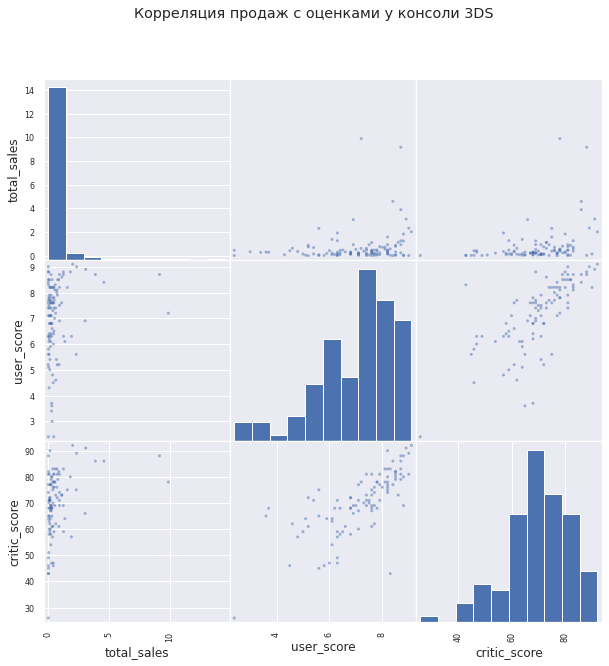

,total_sales,user_score,critic_score
total_sales,1.000000,0.197583,0.320803
user_score,0.197583,1.000000,0.722762
critic_score,0.320803,0.722762,1.000000


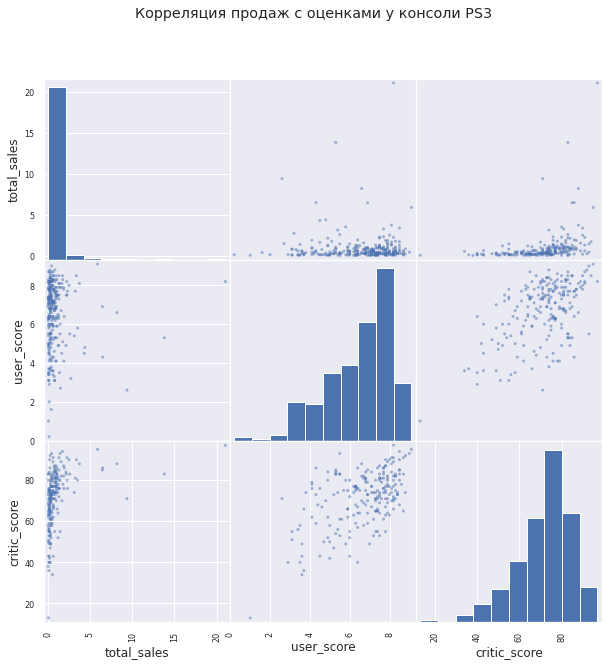

,total_sales,user_score,critic_score
total_sales,1.000000,-0.005144,0.331497
user_score,-0.005144,1.000000,0.539456
critic_score,0.331497,0.539456,1.000000


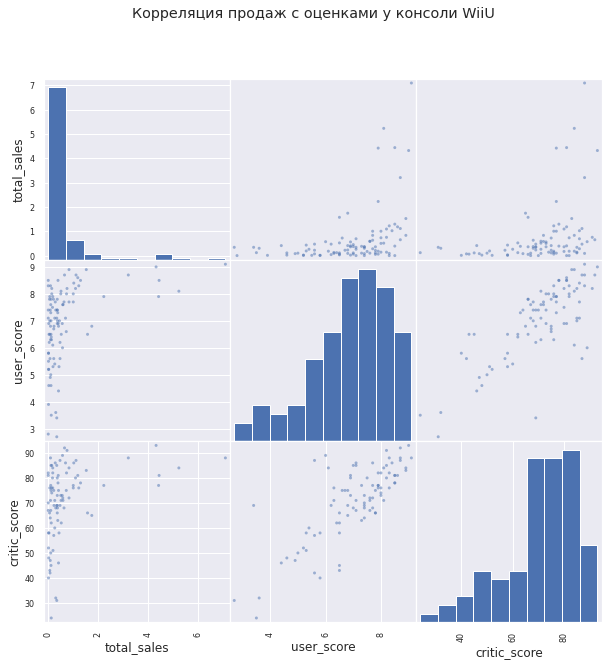

,total_sales,user_score,critic_score
total_sales,1.000000,0.400219,0.34838
user_score,0.400219,1.000000,0.77008
critic_score,0.348380,0.770080,1.00000


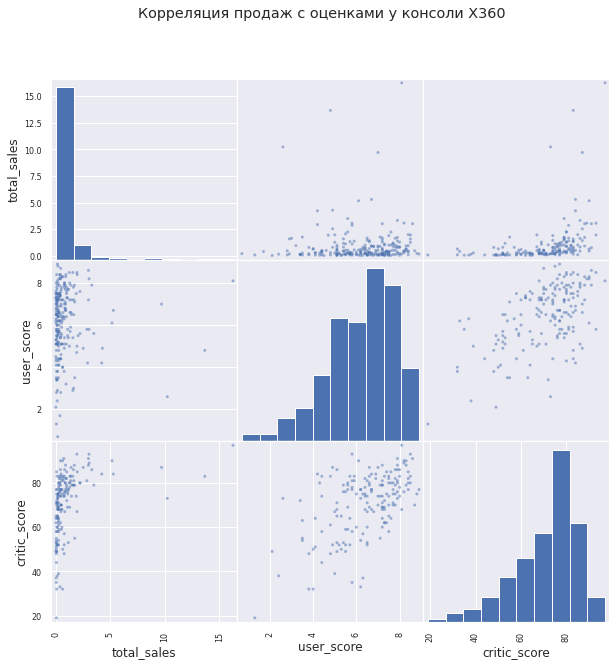

,total_sales,user_score,critic_score
total_sales,1.000000,0.006164,0.360573
user_score,0.006164,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


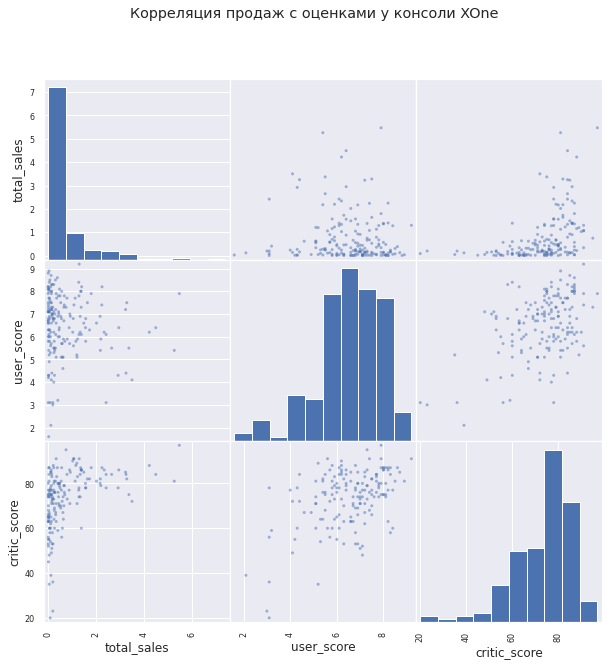

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


In [43]:
import warnings

warnings.filterwarnings('ignore')
data_gm_plat_list = ['3DS', 'PS3','WiiU', 'X360', 'XOne']

for platform in data_gm_plat_list:
    data = gm_act.query('platform == @platform')[['total_sales','user_score', 'critic_score']]
    
    fig, ax = plt.subplots(figsize = (10,10))
    pd.plotting.scatter_matrix(data, ax=ax)
    fig.suptitle(f'Корреляция продаж с оценками у консоли {platform}')
    plt.show()   
    
    display(gm_act.query('platform == @platform')[['total_sales','user_score', 'critic_score']].agg('corr'))

**Общие черты корреляций**: оценка критиков немного сильнее коррелирует с продажами, хотя эту связь нельзя назвать сильной.


Оценки пользователей влияют на продажи еще меньше.



Корреляция оценок пользователей и продаж слабая. Может быть связано и с тем, что не все пользователи пишут отзывы и оставляют оценки. 


Но есть и обратный пример. На платформе WiiU отзывы пользователей коррелируют с продажами больше, чем отзывы критиков.




О ней в целом трудно говорить, т.к. например, той же  ГТА может прилететь отличная оценка, из-за того, что это культовая игра и плохие ожидания - последнее, чего ждут от законодателей мод в жанре.



### Жанры игр

In [44]:
# # Комментарий ревьюера
temp1, temp2 = df_top_of_platform.total_sales.sum(), data_games.query('year_of_release > 2011').total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1446.5300000000002, 1446.5300000000002, 0.0)

In [45]:
#беру весь актуальный период
df_top_of_platform = gm_act.pivot_table(index='genre', values='total_sales', columns = 'platform', aggfunc = 'sum', fill_value=0, margins=True).sort_values(by='All', ascending=False)
df_top_of_platform

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
genre,,,,,,,,,,,,
All,194.61,12.55,62.65,288.79,314.14,11.19,49.18,35.37,82.19,236.54,159.32,1446.53
Action,45.49,1.82,13.14,115.75,96.10,3.76,16.33,10.75,19.07,81.60,37.31,441.12
Shooter,0.13,0.00,14.27,60.39,88.56,0.00,2.34,0.00,6.01,72.70,60.33,304.73
Role-Playing,79.30,9.08,13.65,22.62,28.99,2.81,12.05,1.06,2.89,9.80,10.55,192.80
Sports,4.23,0.11,3.26,44.84,55.61,1.41,3.21,2.11,3.16,36.39,26.74,181.07
Misc,9.45,0.48,0.73,8.88,8.19,0.41,4.32,17.86,12.46,14.83,7.43,85.04
Platform,19.11,0.69,0.14,4.26,7.69,0.00,2.26,2.25,21.53,2.14,0.93,61.00
Racing,0.28,0.00,1.23,11.56,12.14,0.00,2.21,0.01,7.87,8.41,9.79,53.50
Fighting,8.46,0.00,0.12,11.00,8.65,0.36,2.21,0.00,6.27,4.97,2.45,44.49


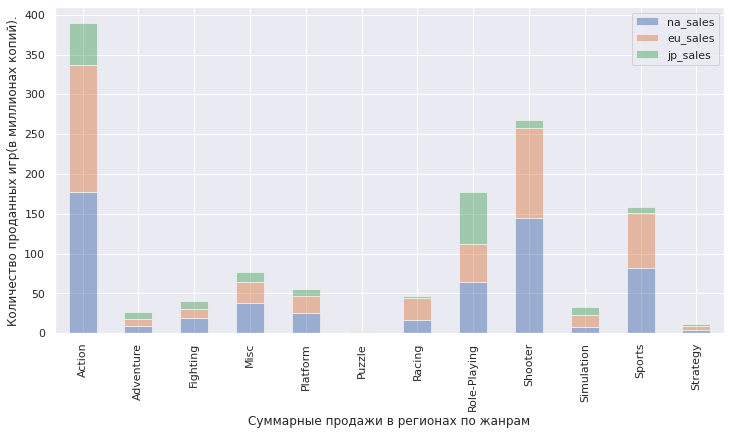

In [46]:
gm_act.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').plot(kind='bar',stacked=True, figsize=(12,6), alpha=0.5)
plt.xlabel('Суммарные продажи в регионах по жанрам')
plt.ylabel('Количество проданных игр(в миллионах копий).')
plt.show()

Самыми продаваемыми жанрами в играх являются **Action, Shooter и RPG**.

* `Action` - отражает свою сущность в названии. Ты находишься в центре событий и тебе необходимо постоянно принимать решения и действовать.



* `Shoters` - стрелялки во все время были популярным жанром. Начиная с "Maze War (1973)" и заканчивая современным "Atomic Heart". Часто шутер - отличная площадка для внедрения различных элементов из других жанров(например, RPG). Это дает возможность развивать персонажа, добавляяя ему различные способности, позволяющие эффективнее или зрелищнее побеждать врагов. Может быть как от первого, так и от третьего лица




* `Role-Playng(RPG)` - отличительная черта жанра - выбор персонажа, который влияет как на стиль игры, так и ее исход в целом. В зависимости от того, какой путь избрал игрок для своего подопечного, может меняться концовка игры. Также игра требует отдельного внимания к деталям. Чем изощренней у персонажа оружие и браня и чем выше уровень самого персонажа, тем увереннее игрок будет себя ощущать на поле боя.



Также не пройдем мимо жанра `Sports` - спортивные симмуляторы также пользуются популярностью. Они могут быть совершенно разного толка: начиная с футбола и хоккея, заканчивая бильярдом или боулингом.



А вот хуже всего продаются игры в жанрах **Adventure, Strategy и Puzzle.**



`Adventure` - в приключениях пользователи взаимодействуют с другими персонажами и окружающим миром для разгадки разных квестов, таким образом продвигаясь по сюжету(часто линейному). На различный сайд-квестах могут встречаться мини-квесты, с задачами на логику, например.

Не такой активный жанр, как "Action", например. Полагаю, поэтому среди большой доли игроков жанр не пользуется большой популярностью.


`Strategy` - старший брат старых добрых настолок. Например, Герои 3. Минимум экшена. Чтобы успешно пройти игру, важно принимать правильные решения, учитывая огромное кол-во факторов. Одним словом - надо мыслить стратегически.


Думаю, комментировать, почему `Puzzle` плохо продается, необходимости нет.


Сравним медианные продажи и проиллюстрируем диаграммой размаха

In [47]:
#сравниваю медианные продажи
df_top_of_platform = gm_act.pivot_table(index='genre', values='total_sales', columns = 'platform', aggfunc = 'median', fill_value=0, margins=True).sort_values(by='All', ascending=False)
df_top_of_platform

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
genre,,,,,,,,,,,,
Shooter,0.065,0.000,0.220,0.385,0.970,0.000,0.565,0.000,0.120,0.470,1.095,0.440
Sports,0.205,0.055,0.060,0.360,0.525,0.140,0.100,0.380,0.365,0.465,0.335,0.240
Platform,0.210,0.345,0.060,0.250,0.300,0.000,0.085,1.125,0.580,0.110,0.160,0.210
Role-Playing,0.220,4.540,0.160,0.160,0.200,0.090,0.070,0.530,0.410,0.490,0.320,0.140
Racing,0.280,0.000,0.030,0.170,0.230,0.000,0.050,0.010,0.510,0.230,0.185,0.140
Fighting,0.080,0.000,0.050,0.190,0.170,0.015,0.115,0.000,0.190,0.225,0.200,0.130
All,0.110,0.050,0.080,0.200,0.200,0.030,0.050,0.180,0.220,0.310,0.220,0.120
Action,0.090,0.040,0.090,0.260,0.155,0.040,0.050,0.150,0.150,0.335,0.150,0.120
Misc,0.110,0.240,0.020,0.075,0.075,0.020,0.065,0.220,0.215,0.270,0.180,0.120


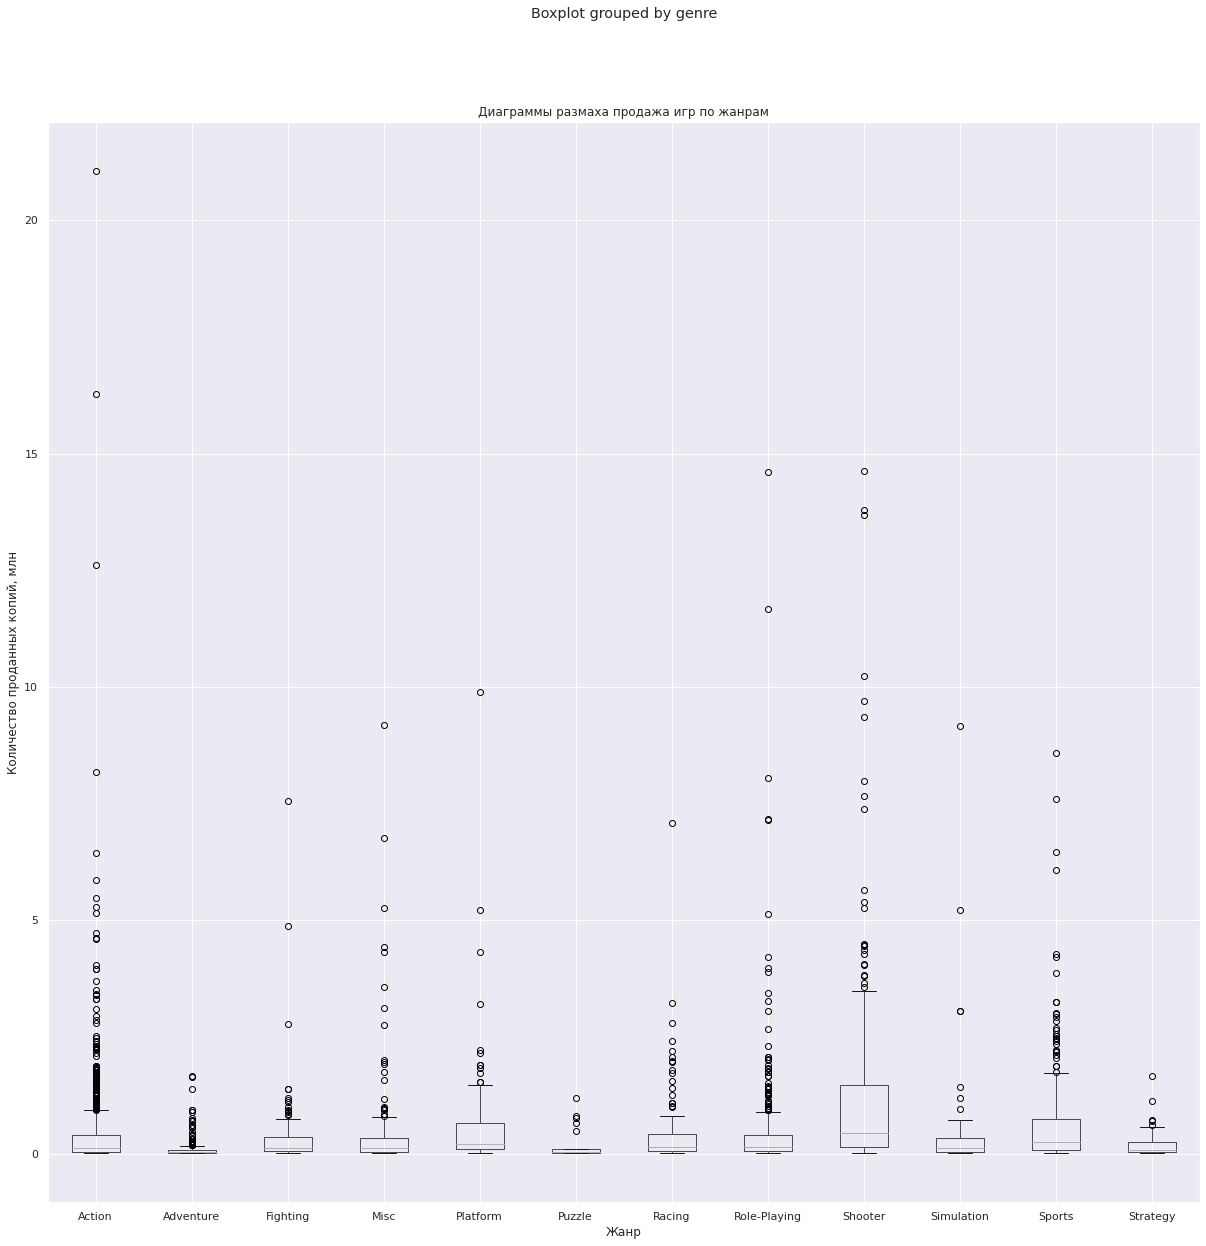

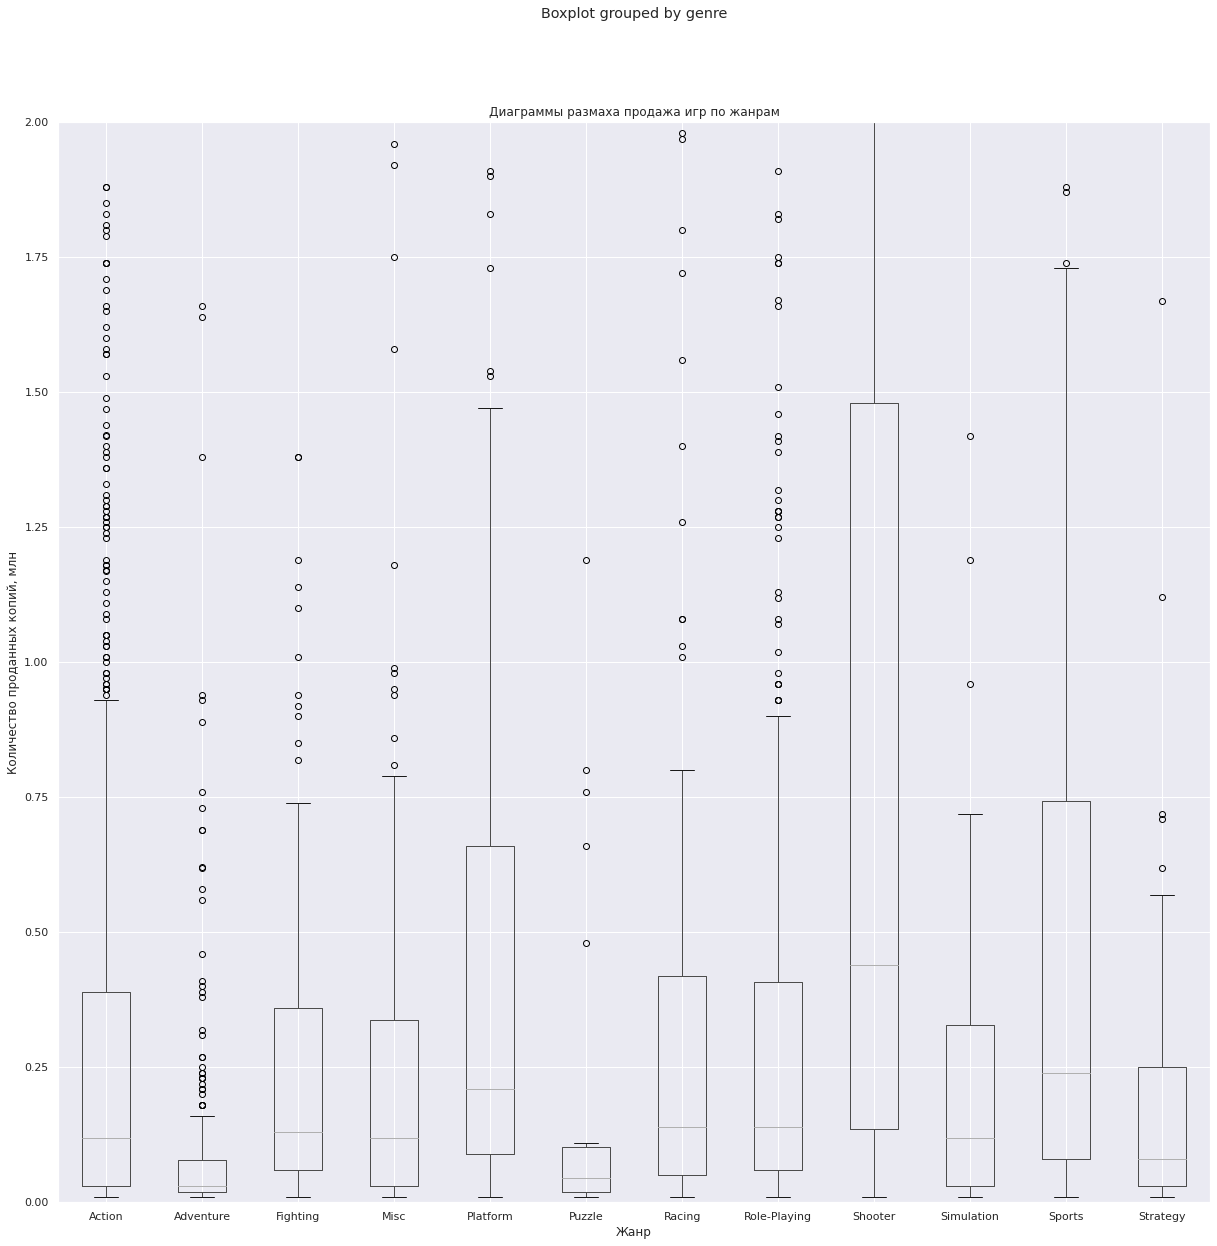

In [48]:
gm_act.query('year_of_release > 2011').boxplot(column='total_sales', by='genre', figsize=(20,20))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха продажа игр по жанрам')
plt.show()


gm_act.query('year_of_release > 2011').boxplot(column='total_sales', by='genre', figsize=(20,20))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха продажа игр по жанрам')
plt.ylim(0, 2)
plt.show()

Ни один жанр не обладает симметричным распределением, где все предсказуемо и нет разброса в данных. Произвели игру - продали, произвели - продали

Самыми стабильными жанрами в играх являются **Shooter, Sports и Platform**.


* `Shoters` - стрелялки во все время были популярным жанром. Начиная с "Maze War (1973)" и заканчивая современным "Atomic Heart". Часто шутер - отличная площадка для внедрения различных элементов из других жанров(например, RPG). Это дает возможность развивать персонажа, добавляяя ему различные способности, позволяющие эффективнее или зрелищнее побеждать врагов. Может быть как от первого, так и от третьего лица



* `Sports` - спортивные симмуляторы также пользуются популярностью. Как и указано в названии, они симулируют виды спорта. Могут быть совершенно разного толка: начиная с футбола и хоккея, заканчивая бильярдом или боулингом.




* `Platform` - жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня. Многие игры подобного жанра характеризуются нереалистичностью, рисованной мультяшной графикой.




А вот хуже всего продаются игры в жанрах **Adventure, Strategy и Puzzle.**



`Adventure` - в приключениях пользователи взаимодействуют с другими персонажами и окружающим миром для разгадки разных квестов, таким образом продвигаясь по сюжету(часто линейному). На различный сайд-квестах могут встречаться мини-квесты, с задачами на логику, например. Не самый активный жанр. Полагаю, поэтому он не пользуется большой популярностью.



`Strategy` - старший брат старых добрых настолок. Например, Герои 3. Минимум экшена. Чтобы успешно пройти игру, важно принимать правильные решения, учитывая огромное кол-во факторов. Одним словом - надо мыслить стратегически.


Думаю, комментировать, почему `Puzzle` плохо продается, необходимости нет.



### Топ-5 платформ

In [49]:
platform_na = (gm_act.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
.sort_values(by = 'na_sales', ascending = False).reset_index().loc[:4])
sum_p = (gm_act.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
.sort_values(by ='na_sales', ascending = False).iloc[5:].sum()[0])
platform_na.loc[5] = ['Другие платформы', sum_p]
platform_na

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,Другие платформы,90.37


In [50]:
platform_eu = (gm_act.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(by = 'eu_sales', ascending = False).reset_index().loc[:4])
sum_p = (gm_act.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
.sort_values(by ='eu_sales', ascending = False).iloc[5:].sum()[0])
platform_eu.loc[5] = ['Другие платформы', sum_p]
platform_eu

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,Другие платформы,90.12


In [51]:
platform_jp = (gm_act.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(by = 'jp_sales', ascending = False).reset_index().loc[:4])
sum_p = (gm_act.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
.sort_values(by ='jp_sales', ascending = False).iloc[5:].sum()[0])
platform_jp.loc[5] = ['Другие платформы', sum_p]
platform_jp

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,Другие платформы,19.49


Text(0.5, 1.0, 'jp_sales')

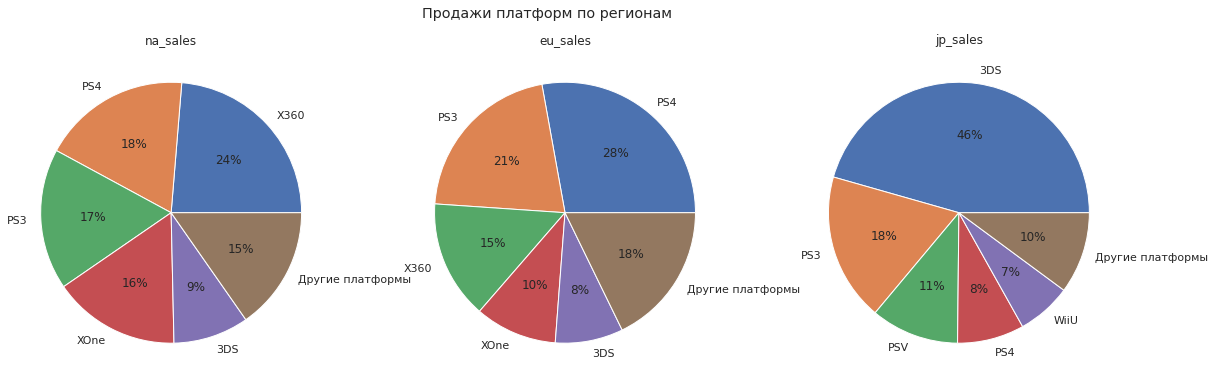

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Продажи платформ по регионам')
ax1.pie(platform_na['na_sales'], labels=platform_na['platform'],autopct='%1.0f%%')
ax1.set_title('na_sales')
ax2.pie(platform_eu['eu_sales'], labels=platform_eu['platform'],autopct='%1.0f%%')
ax2.set_title('eu_sales')
ax3.pie(platform_jp['jp_sales'], labels=platform_jp['platform'],autopct='%1.0f%%')
ax3.set_title('jp_sales')


**Вывод:**

В Европе и Северной Америке топ-5 плаформ одинаковые, но занимают разные доли рынка и распределены по-разному. Это: XOne, XBox 360, 3DS, PlayStation 3, PlayStation 4. Ответливо видно ротацию поколений консоли. PS4, не смотря на сравнительно недавний выход, уже пользуется успехом и большого кол-ва геймеров.  



Японcкий рынок значительно отличается от американского и европейского. Японцы больше ценят портативность, нежели стационарные консоли. Причин этому может быть много. 

Возможно, японцы рассматривают портатив из-за удобного форм-фактора. Также очевидно, что, по разным причинам, Nintendo более ориентировано на продажи в своей стране. Они частенько делают игры-эксклюзивы, только для определенной консоли, чем мотивируют покупку приставки хотя бы ради этой игры. Так было с Mario Cart, например.

### Топ-5 жанров

In [57]:
genre_na = (gm_act.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')\
.sort_values(by = 'na_sales', ascending = False).reset_index().loc[:4])
sum_p = (gm_act.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
.sort_values(by ='na_sales', ascending = False).iloc[5:].sum()[0])
genre_na.loc[5] = ['Другие жанры', sum_p]
genre_na

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Другие жанры,84.64


In [58]:
genre_eu = (gm_act.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(by = 'eu_sales', ascending = False).reset_index().loc[:4])
sum_p = (gm_act.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
.sort_values(by ='eu_sales', ascending = False).iloc[5:].sum()[0])
genre_eu.loc[5] = ['Другие жанры', sum_p]
genre_eu

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,Другие жанры,89.10


In [59]:
genre_jp = (gm_act.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(by = 'jp_sales', ascending = False).reset_index().loc[:4])
sum_p = (gm_act.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
.sort_values(by ='jp_sales', ascending = False).iloc[5:].sum()[0])
genre_jp.loc[5] = ['Другие жанры', sum_p]
genre_jp

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,Другие жанры,41.63


Text(0.5, 1.0, 'jp_sales')

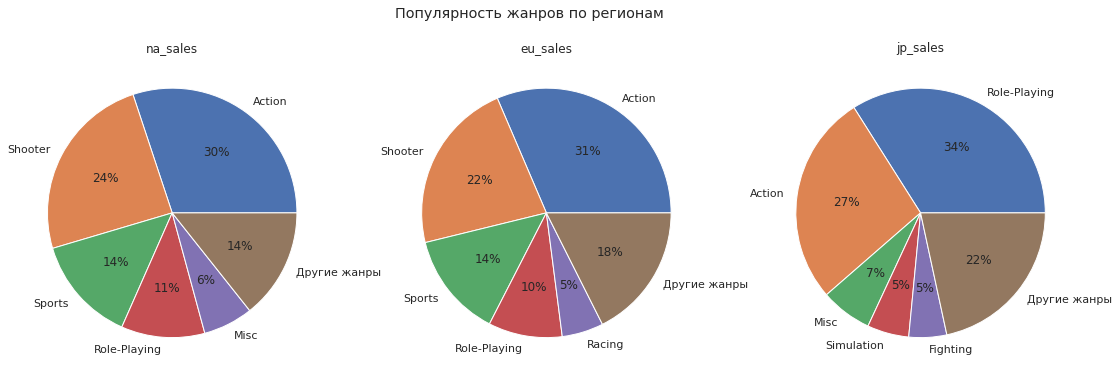

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19,6))
fig.suptitle('Популярность жанров по регионам')
ax1.pie(genre_na['na_sales'], labels=genre_na['genre'],autopct='%1.0f%%')
ax1.set_title('na_sales')
ax2.pie(genre_eu['eu_sales'], labels=genre_eu['genre'],autopct='%1.0f%%')
ax2.set_title('eu_sales')
ax3.pie(genre_jp['jp_sales'], labels=genre_jp['genre'],autopct='%1.0f%%')
ax3.set_title('jp_sales')

**ВЫВОД**

**Вывод**

В распределении рынка по жанрам у Америки и Европы вкусы совпадают по всем 5 пунктам, хотя и немного в разных пропорциях: 


  1)**Action** (Америка: 30%, Европа: 31%)
  
  2)**Shooters** (Америка: 24%, Европа: 22%)
  
  3)**Sports** (Америка: 14%, Европа: 14%)
  
  4)**Role_playing** (Америка: 11%, Европа: 10%)
  
  5)**Пятое вместо в Америке занимает "Mics"(разное)**(6%), **в Европе - Racing**(5%) 


  




У японцев:

1)**Role-Playing** (34%)


2)**Action** (27%)


3)**Mics** (7%)


4)**Simulation** (5%)


5)**Fighting** (5%)



*в Серевной Америке сумма процентов всех жанров составляет 99%. Не стал изменять округление, чтобы сохранить процентаж в едином стиле


### РЕЙЭТИНГ ESRB

In [61]:
gm_act.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'],aggfunc ='sum').apply(
lambda col: col / col.sum(), axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,22.3%,14.7%,19.4%
E10+,10.9%,4.3%,12.8%
M,38.3%,11.0%,39.2%
T,10.4%,13.5%,11.2%
Unknown,18.1%,56.5%,17.5%


Глядя на распределение, можно сделать два вывода.

    1)В Японии много игр без рейтинга вообще. Либо, рейтинг на игры их топ приставкок составляет не ESRB, либо игры, которые популярны в стране локально, не были оценены и не получили рейтинга.

    2)Самые продаваемые категории в Европе и Америке практически совпадают




## Вывод

**Региональные особенности влияют как на то, какие жанры популярны, так и на то, какие платформы**


В Европе и Северной Америке, с небольшим отличием, популярность делят XBox 360, XOne, PlayStation 3 и PlayStation 4. Примечатльно, что все платформы стационарные. Среди жанров лидируют экшены, спортивные игры и шутеры.


В Японии же популярны портативные консоли - Nintendo 3DS и PlayStation Vita, но стационарные PlayStation 4 и PlayStation 3 также популярны у пользователей. Топ жанров возглавляют РПГ, экшены и симуляторы.

## Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Используем тест Стьюдента(t-test), чтобы сравнить среднее значение двух выборок.

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


**H0** - средние рейтинги не отличаются

**H1** - соответсвенно, рейтинги отличаются

Критический уровень вероятности примем равным 5%. Пропуски в столбцах удалим.

Если p-value будет меньше выбранного уровня значимости(alpha), то отвергнем **H0**

In [62]:
import warnings

warnings.filterwarnings('ignore')

from scipy import stats as st
#беру актальный период
display(gm_act.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score'))

# удалим пропуски
#поменял на переменную с актуальным периодом
xone = gm_act.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)
pc = gm_act.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

alpha = .05

results = st.stats.ttest_ind(xone, pc, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

,user_score
platform,
PC,6.428641
XOne,6.521429


p-значение:  0.5489537965134912
Не удалось отвергнуть нулевую гипотезу


Средние рейтинги ПК и Xbox One не отличаются. Различие средних статистически не значимо. Делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Действуем по аналогии:
    
**H0** - средние рейтинги жанров Action и Sport не отличаются

**H1** - соответсвенно, средние рейтинги Action и Sport отличаются

Если p-value будет меньше выбранного уровня значимости(alpha), то отвергнем **H0**

Если нет - считаем, что данные не позволили отвергнуть **H0**

In [63]:
import warnings

warnings.filterwarnings('ignore')
#указываю актуальный период
display(gm_act.query('genre in ["Sports", "Action"]').pivot_table(index='genre', values='user_score'))

# удаляем пропуски

action = gm_act.query('genre == "Action"').user_score.dropna().reset_index(drop=True)
sport = gm_act.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

alpha = .05

results = st.stats.ttest_ind(action, sport, equal_var=False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

,user_score
genre,
Action,6.825048
Sports,5.455897


p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


Средние рейтинги Action и Sport отличаются. Отвергаем нулевую гипотезу. 

# Общий вывод

Мы выполнили поставленную перед нами задачу. А именно: на основе данных о продажах игр за 2016 год, выявить закономерности, 

определяющие успешность игр.

Какие выводы сделали:

* 1)Самыми потенциально прибыльными консолями являются Sony PlayStation 4 и Xbox One от Microsoft. Несколько лет будут актуальны платформы Nintendo 3DS



* 2)Америке выгодрнее всего выпускать на игры Xbox 360 и PS4, в Европе - на PS4? PS3, в Японии - на 3DS/



* 3)Корреляция продаж и оценок пользователей\критиков не очень сильная. Однако, если оценки пользователе не влияют на продажи вообще, то оценки критиков могут и оказать незначительное влияние.




* 4)Отобрали коммерчески успешные жанры: это **Action,Shoters и Sports**(Для Америки и Европы). В Японии более успешны игры в жанре Role-Playing)



* 5)Большое кол-во пользователей довольно быстро переходят на новые консоли. В свою очередь, производитель, пытается сделать этот переход более плавным, выпуская топовые тайтлы как на новые, так и на более старые консоли.Пример:GTA



Проверили две гипотезы, которые показали:

* 1)средние рейтинги ПК и Xbox One не отличаются. Различие средних статистически не значимо


* 2)что средние ользовательские оценки игр в жанрах Action и Sports отличаются.

**На какие платформы, с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет**

**Америка и Европа**

Если выбирать по одному\двум параметрам для каждого региона, то для регионов **Европы и Америки** я бы рекомендовал обратить внимание на платфромы **PS4** и **XboxOne** и т.к. они произведены недавно и на них еще долгое время будут выходить современные игры, в том числе и бестселлеры. 

Плюс, есть шанс того, что пользователи PS3 и Xbox360 "пересядут" как раз на них, тем самым, увеличив базу пользователей более молодых платформ. Учитывая смену поколений, это вопрос нескольких лет, как минимум, когда перестанут поддерживаться культовые серии игр.

Жанры бы выбрал **Shooter** и **Sports**, хотя они менее популярные в Европе и Америка, чем **Action**, например. Но, как показывает исследование, эти жанры в разы стабильнее Action, поэтому шанс получать стабильную прибыль у Shooter и Sports выше. В случае, если тайтл "выстрелит", эта прибыль будет еще и стабильно высокой.

Когда мы говорим о шутерах, рейтинг ESRB у популярных игр, в основном **M(«Mature», "Для взрослых")**. В случае спортивных симуляторов, это чаще всего **E(everyone)**. Но это относится только к Америке и Канаде. 

Европейский эквивалент данных рейтингов скорее **PEGI 16**(Игры данного класса могут включать умеренные сцены насильственных действий и сцены сексуального характера, которые должны соответствовать тем, которые могут встретиться в реальной жизни. Допускаются сцены курения табака или принятия наркотиков, отсылки к азартным играм, грубый юмор и бранные слова.) **в случае шуттеров.** 

И **PEGI 3**(3: Подходит для любых возрастных групп. Игра может содержать очень условное насилие в комическом подтексте (по типу «Ну, погоди!», «Том и Джерри») без нанесения вреда мультипликационным персонажам. Ребёнок не должен ассоциировать героев с реальными личностями, они должны быть полностью придуманными. Не должно быть никаких звуков или изображений, которые могут испугать маленьких детей. Нет грубой лексики.) **в случае спортивных симмуляторов.**



Относительно Европы и Америки, на отзывы я бы обращал внимание, в зависимости от противоречивости взятого тайтла. Как показало иссследование, влияние на продажи, оказывают только отзывы критиков. И то, довольно косвенно. В этих регионах, отзывы - вещь достаточно субъективная.



**Япония**

В Японии картина отличается от остальных регионов. Здесь бы я не делал большую ставку на новые платформы. Здесь явно главенствует портатив, в виде **Nintendo 3DS**. Так как ее в данных нет и единственный ее конккурент - PSVita(которая находится на последнем издыхании), рекламную компанию ориентировал бы на 3DS. 


Жанр бы выбрал **Platform**, хотя он и не самый популярный жанр, однако самый стабильный. Казалось бы, логичнее выбрать **Role-Playing**, однако платформеры в принципе стабильнее продаются и в случае провала рекламной компании, производитель все равно будет получать больше прибыли от платформера, нежели от ролевой игры. К тому же, 3DS не самая сильная платформа, с точки зрения "железа". Идея сделать интересный, красочный платформер с сюжетом кажется более преспективной, нежели сделать среднюю РПГ.



В нашемм исследовании превалируюший рейтинг игр в японском регионе - **E**. Выберем японский эквивалент рейтинга ESRB(CERO). Пусть это будет рейтинг **А** Большинство игр-бестселлеров в этом жанре как раз имеют такой рейтинг.

Здесь отзывы имеют большее значение, чем в Европе и США. Как показал пример с Nintendo WiiU, здесь присутствует корреляция отзывов пользователей и общих продаж. Так как у нас нет более подробных данных о японском рынке, Я бы ориентировался на них.